In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

In [18]:
start_date = '2010-02-24'
end_date = '2025-02-24'
stock_symbol = 'TSLA'

stock_data = yf.download(stock_symbol , start_date , end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [20]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
2025-02-14,355.839996,362.000000,347.500000,360.619995,68277300
2025-02-18,354.109985,359.100006,350.019989,355.010010,51631700


In [22]:
stock_data.reset_index(inplace=True)

In [24]:
stock_data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
3681,2025-02-14,355.839996,362.000000,347.500000,360.619995,68277300
3682,2025-02-18,354.109985,359.100006,350.019989,355.010010,51631700
3683,2025-02-19,360.559998,367.339996,353.670013,354.000000,67094400


In [26]:
MA_100_days = stock_data.Close.rolling(100).mean()

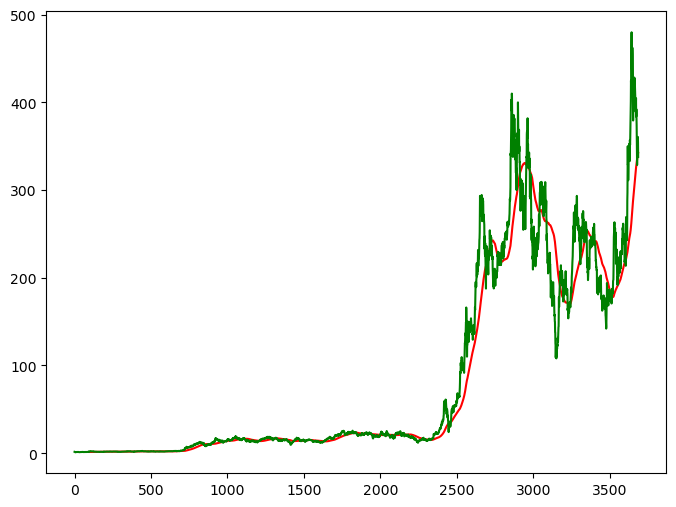

In [28]:
#for Plotting Moving Average 
plt.figure(figsize=(8,6))
plt.plot(MA_100_days , 'r')
plt.plot(stock_data.Close , 'g')
plt.show()

In [ ]:
#Basic Strategy 
#Closing_Price<MA=sell
#Closing_Price>MA=Buy

In [30]:
MA_200_days = stock_data.Close.rolling(200).mean()

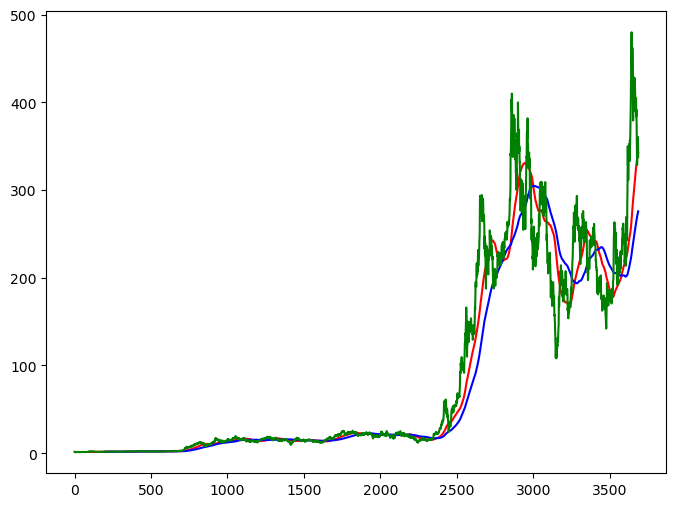

In [34]:
plt.figure(figsize=(8,6))
plt.plot(MA_100_days , 'r')
plt.plot(MA_200_days , 'b')
plt.plot(stock_data.Close , 'g')
plt.show()

In [36]:
stock_data.dropna(inplace=True) 
#It will drop any data that has null values

In [46]:
# We split data into 80-20 split as Training and Testing
stock_data_train = stock_data.Close[0: int(len(stock_data)*0.80)]
stock_data_test = stock_data.Close[int(len(stock_data)*0.80) : len(stock_data)]

In [54]:
stock_data_train.shape[0] 
#Returns the number of tuples for Training data 

2948

In [52]:
stock_data_test.shape[0]
#Returns the number of tuples for Testing data 

738

NOW WE PRE-PROCESS THE DATA INTO 0,1 USING SCALER 

In [58]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
stock_data_train_scale = scaler.fit_transform(stock_data_train)

In [79]:
#Now we perform array slicing
x = []
y = []

for i in range(100, stock_data_train_scale.shape[0]):
    x.append(stock_data_train_scale[i-100:i])
    y.append(stock_data_train_scale[i,0])
#Taking the first 100 days data to predict the next one at one data    

In [83]:
x , y = np.array(x) , np.array(y)
#Conversion into arrays

In [107]:
# MODEL CREATION
import tensorflow as tf
from tensorflow.keras.layers import Dense , Dropout , LSTM 
from tensorflow.keras.models import Sequential

In [109]:
model = Sequential()
# model.add(input(shape=(x.shape, 1)))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) #Not adding return sequences because it is the last layer 
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\geniu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [113]:
model.fit(x , y , epochs = 50 , batch_size = 32 , verbose = 1)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0220
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0032
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0028
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0026
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0023
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0021
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0021
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0024
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0018
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0020
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0019
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0021
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.0019
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - loss: 0.0021
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.

In [115]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [117]:
past_100_days = stock_data_train.tail(100)

In [127]:
stock_data_test = pd.concat([past_100_days , stock_data_test] , ignore_index = True)

In [129]:
stock_data_test

Ticker,TSLA
0,288.600006
1,298.000000
2,303.226654
3,341.619995
4,339.476654
...,...
833,355.839996
834,354.109985
835,360.559998
836,354.399994


In [131]:
stock_data_test_scale = scaler.fit_transform(stock_data_test)

In [133]:
#Now we again perform array slicing
x = []
y = []

for i in range(100, stock_data_test_scale.shape[0]):
    x.append(stock_data_test_scale[i-100:i])
    y.append(stock_data_test_scale[i,0])
#Taking the first 100 days data to predict the next one at one data 

In [135]:
x , y = np.array(x) , np.array(y)

In [137]:
y_predict = model.predict(x)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


In [139]:
y_predict

array([[0.44764107],
       [0.44294593],
       [0.43876156],
       [0.43708754],
       [0.43975258],
       [0.44766122],
       [0.46274072],
       [0.4843718 ],
       [0.51033145],
       [0.5370659 ],
       [0.5654548 ],
       [0.59463435],
       [0.6219448 ],
       [0.64417696],
       [0.66046673],
       [0.6741801 ],
       [0.6838679 ],
       [0.68722695],
       [0.68528056],
       [0.678483  ],
       [0.6664857 ],
       [0.6514175 ],
       [0.63668686],
       [0.62304777],
       [0.6117832 ],
       [0.604484  ],
       [0.5993062 ],
       [0.59634453],
       [0.5952225 ],
       [0.5951696 ],
       [0.59092283],
       [0.58187616],
       [0.5690883 ],
       [0.55416256],
       [0.53968245],
       [0.527531  ],
       [0.5199928 ],
       [0.514935  ],
       [0.5105281 ],
       [0.50382984],
       [0.49452618],
       [0.4819942 ],
       [0.46672863],
       [0.45066702],
       [0.4345771 ],
       [0.41983303],
       [0.4063684 ],
       [0.394

In [141]:
scaler.scale_

array([0.00268991])

In [147]:
scale = 1/scaler.scale_

In [149]:
y_predict = y_predict*scale

In [151]:
y = y*scale

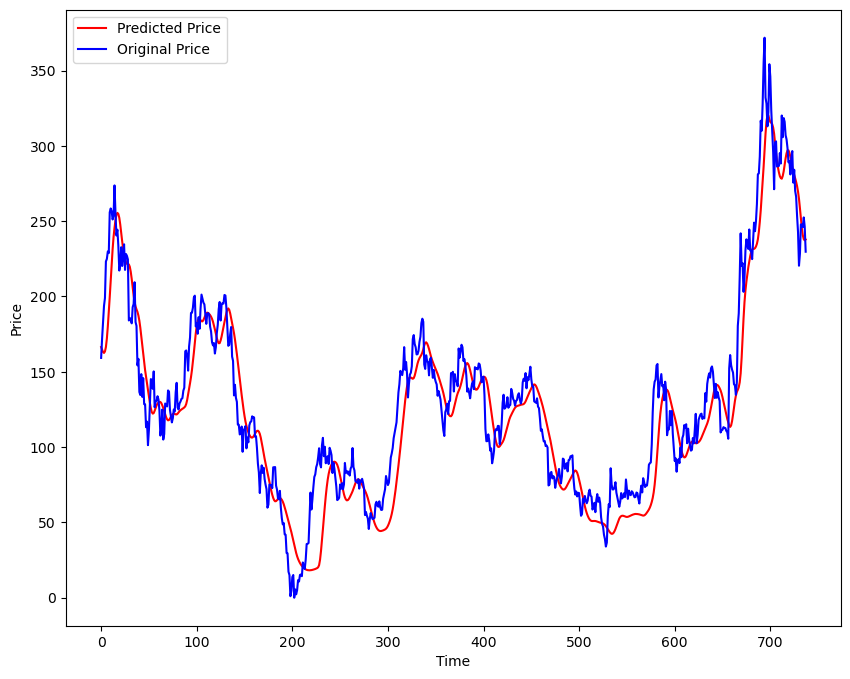

In [153]:
plt.figure(figsize=(10,8))
plt.plot(y_predict , 'r' , label = 'Predicted Price')
plt.plot(y , 'b' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [157]:
model.save('Stocks Prediction Model.keras')